In [1]:
import yfinance as yf
import pandas as pd

stock = "AAPL" # Apple stock ticker

# Download stock data from Yahoo Finance
data = yf.download(stock, start="2015-01-01", end="2025-03-10")

# filename
Apple_data = f"{stock}_stock_data.xlsx"

# Save the data to an Excel file
data.to_excel(Apple_data, engine="openpyxl")

print(f"Stock data saved as {Apple_data}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Stock data saved as AAPL_stock_data.xlsx


In [ ]:
# Clean reinstall of core packages
!pip uninstall -y numpy
!pip install numpy==1.26.4
!pip install pandas==2.2.2 scikit-learn==1.3.2 tensorflow==2.18.0 pandas_ta
!pip install git+https://github.com/philipperemy/keras-tcn.git@master

# Restart kernel after this cell
import os
os.kill(os.getpid(), 9)  # Forces Colab to restart the runtime


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Cloning https://github.com/philipperemy/keras-tcn.git (to revision master) to /tmp/pip-req-build-zfo1sjrp
  Running command git clone --filter=blob:none --quiet https://github.com/philipperemy/keras-tcn.git /tmp/pip-req-build-zfo1sjrp
  Resolved https://github.com/philipperemy/keras-tcn.git to commit 30a765c1daad74514874a6fb363fd428298af899
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas_ta as ta

# Load stock data from Excel
df = pd.read_excel("AAPL_stock_data.xlsx", skiprows=1)

# Rename columns
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

# Convert Date column to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.dropna(subset=["Date"], inplace=True)
df.set_index("Date", inplace=True)

# Convert all relevant columns to numeric
for col in ["Open", "High", "Low", "Close", "Volume"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.dropna(inplace=True)

# Compute Technical Indicators
df["RSI"] = ta.rsi(df["Close"], length=14)
macd = ta.macd(df["Close"], fast=12, slow=26, signal=9)
df["MACD"] = macd["MACD_12_26_9"]
df["MACD_Signal"] = macd["MACDs_12_26_9"]
df["MACD_Hist"] = macd["MACDh_12_26_9"]
bb = ta.bbands(df["Close"], length=20)
df["BB_Upper"] = bb.iloc[:, 0]
df["BB_Middle"] = bb.iloc[:, 1]
df["BB_Lower"] = bb.iloc[:, 2]
df["ATR"] = ta.atr(df["High"], df["Low"], df["Close"], length=14)

# Drop any rows with missing values after indicators
df.dropna(inplace=True)

# Normalize using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[[
    "Close", "Open", "High", "Low", "Volume", "RSI",
    "MACD", "MACD_Signal", "BB_Upper", "BB_Lower", "ATR"
]])

# Print the structure of the preprocessed data
print("DataFrame after preprocessing and technical indicators:\n")
print(df.info())
print("\nFirst 5 rows:\n")
print(df.head())

print("\nScaled data shape:", scaled_data.shape)
print("First 5 rows of scaled data:\n", scaled_data[:5])


DataFrame after preprocessing and technical indicators:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2527 entries, 2015-02-20 to 2025-03-07
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         2527 non-null   float64
 1   High         2527 non-null   float64
 2   Low          2527 non-null   float64
 3   Close        2527 non-null   float64
 4   Volume       2527 non-null   float64
 5   RSI          2527 non-null   float64
 6   MACD         2527 non-null   float64
 7   MACD_Signal  2527 non-null   float64
 8   MACD_Hist    2527 non-null   float64
 9   BB_Upper     2527 non-null   float64
 10  BB_Middle    2527 non-null   float64
 11  BB_Lower     2527 non-null   float64
 12  ATR          2527 non-null   float64
dtypes: float64(13)
memory usage: 276.4 KB
None

First 5 rows:

                 Open       High        Low      Close       Volume  \
Date                                                 

<ipython-input-2-07760497c685>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - loss: 1.1991 - val_loss: 0.0220
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0171 - val_loss: 0.0260
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0098 - val_loss: 0.0079
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0049 - val_loss: 0.0090
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0034 - val_loss: 0.0101
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.0033 - val_loss: 0.0061
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0029 - val_loss: 0.0107
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0023 - val_loss: 0.0065
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0020 - val_loss: 0.0119
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0019 - val_loss: 0.0125
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0821 - val_loss: 0.0121
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 3.8832e-04
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1821e-04 - val_loss: 7.3303e-04
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7786e-04 - val_loss: 9.9938e-04
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.8984e-04 - val_loss: 5.9327e-04
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.2113e-04 - val_loss: 3.6084e-04
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1709e-04 - val_loss: 3.8414e-04
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8351e-04 - val_loss: 0.0023
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.8185e-04 - val_loss: 6.8278e-04
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0618e-04 - val_loss: 0.0011
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0214e-04 - val_loss: 0.0014
Epoch 12/50
68/68 ━━

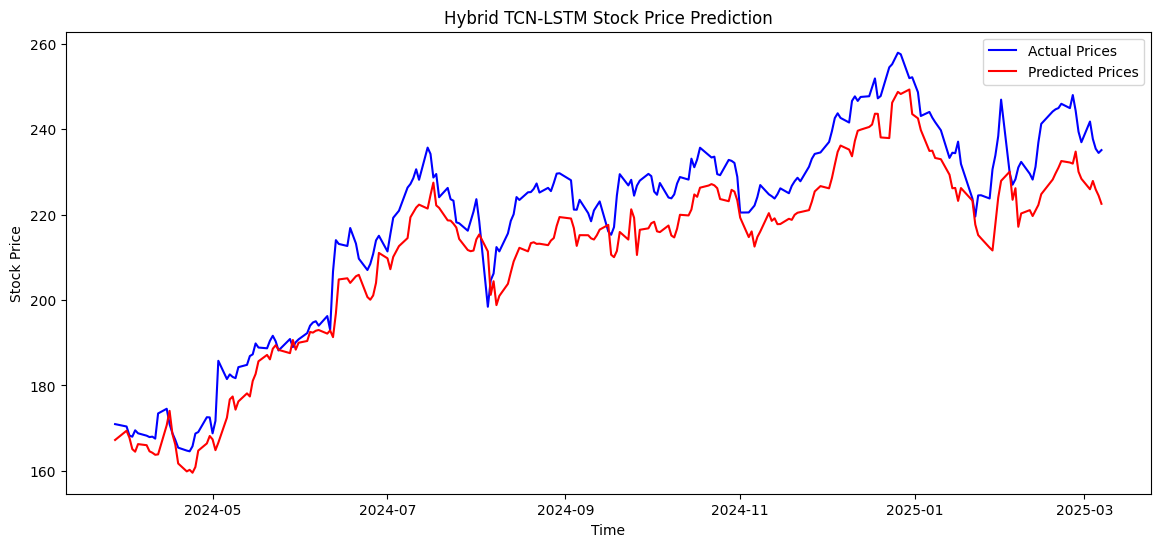

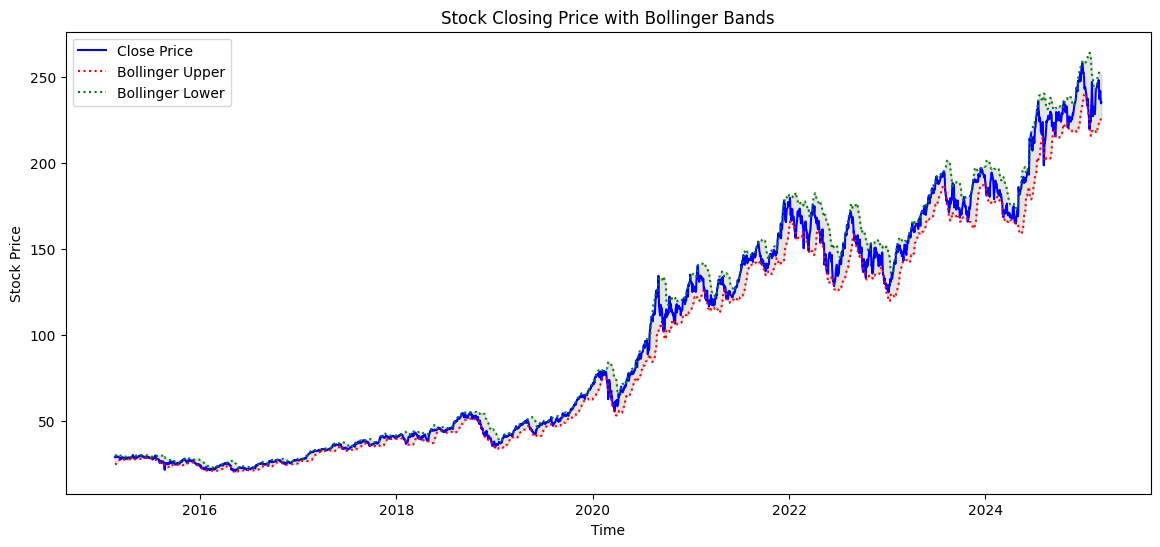

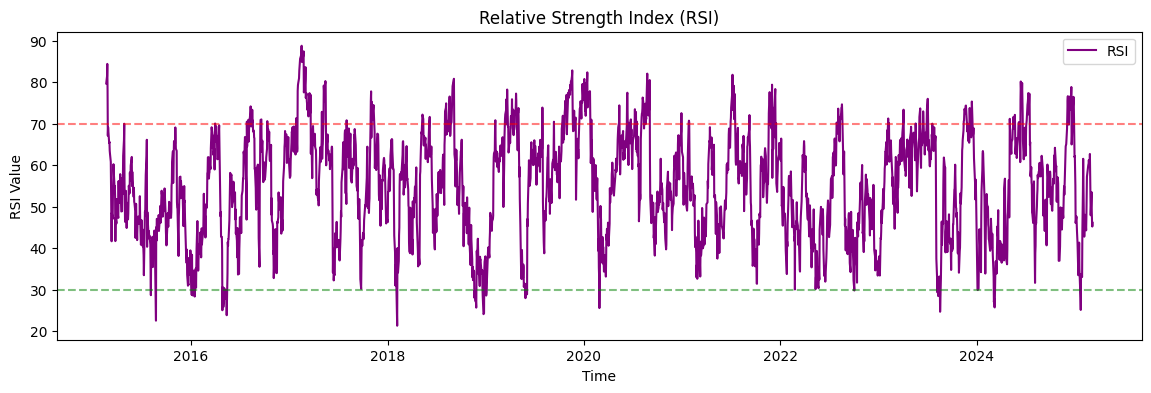

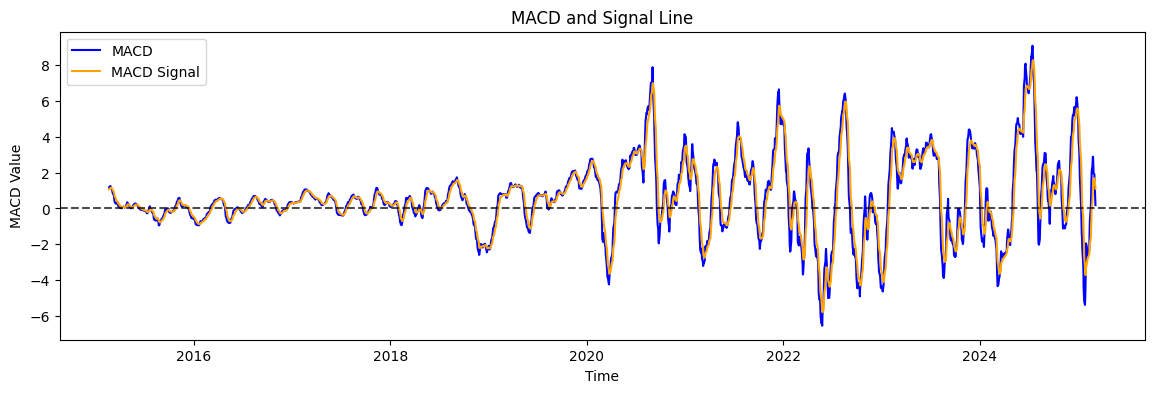

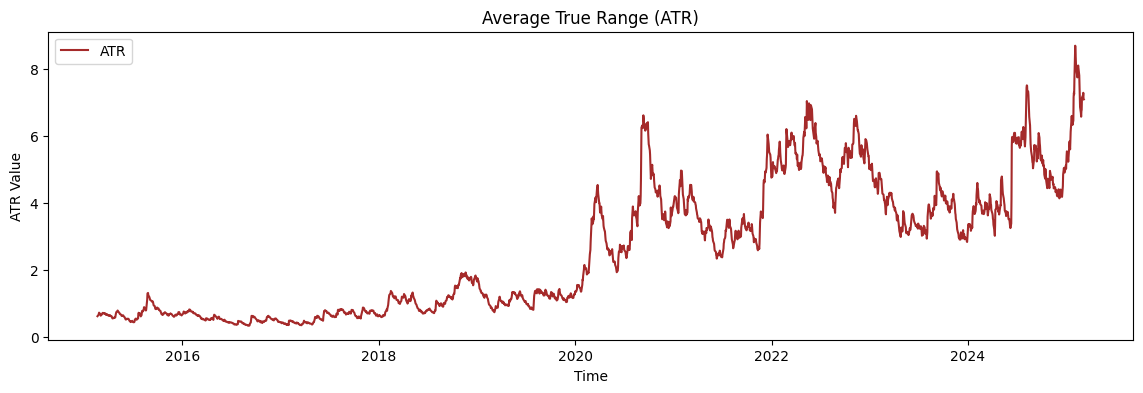

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

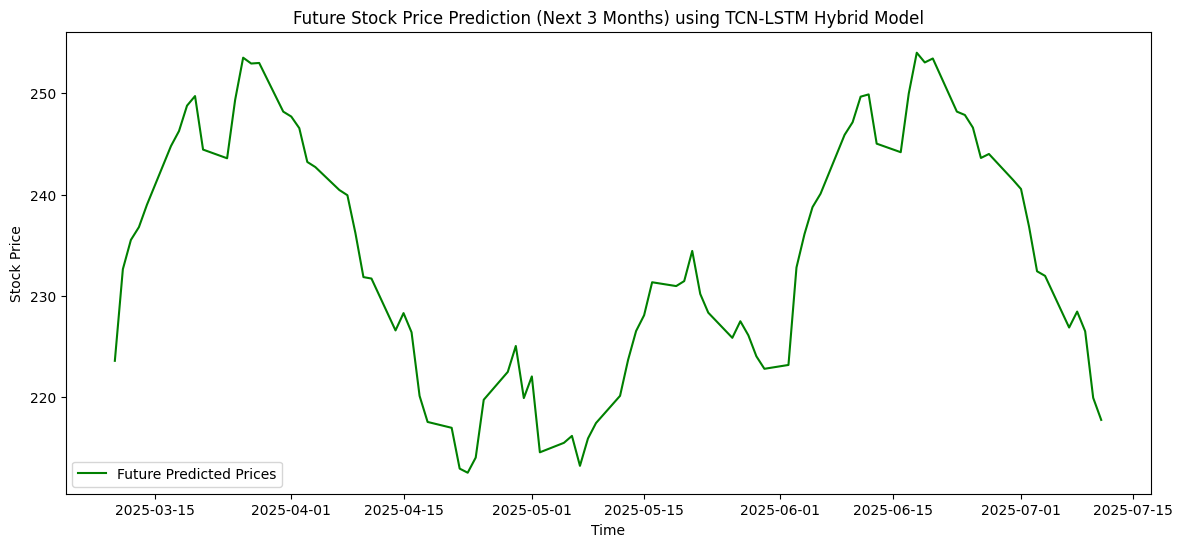

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tcn import TCN  # Import TCN from keras-tcn
import pandas_ta as ta

# Load stock data from Excel (Adjust skiprows if needed)
df = pd.read_excel("AAPL_stock_data.xlsx", skiprows=1)

# Rename columns manually
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")

# Drop invalid dates
df.dropna(subset=["Date"], inplace=True)

# Set Date as index
df.set_index("Date", inplace=True)

# Convert columns to numeric
for col in ["Open", "High", "Low", "Close", "Volume"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop NaN values
df.dropna(inplace=True)

# Compute Technical Indicators
df["RSI"] = ta.rsi(df["Close"], length=14)
macd = ta.macd(df["Close"], fast=12, slow=26, signal=9)
df["MACD"], df["MACD_Signal"], df["MACD_Hist"] = macd["MACD_12_26_9"], macd["MACDs_12_26_9"], macd["MACDh_12_26_9"]

bb = ta.bbands(df["Close"], length=20)
df["BB_Upper"], df["BB_Middle"], df["BB_Lower"] = bb.iloc[:, 0], bb.iloc[:, 1], bb.iloc[:, 2]

df["ATR"] = ta.atr(df["High"], df["Low"], df["Close"], length=14)

# Drop NaN values after computing indicators
df.dropna(inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[["Close", "Open", "High", "Low", "Volume", "RSI", "MACD", "MACD_Signal", "BB_Upper", "BB_Lower", "ATR"]])

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # Predicting 'Close' price
    return np.array(X), np.array(y)

seq_length = 60  # 60-day sequence
train_size = int(len(df.loc["2015-01-01":"2023-12-31"]))  # Training period
X_train, y_train = create_sequences(scaled_data[:train_size], seq_length)
X_test, y_test = create_sequences(scaled_data[train_size:], seq_length)

# **Step 1: Train TCN Model**
tcn_model = Sequential([
    TCN(input_shape=(seq_length, scaled_data.shape[1])),  # Use all features
    Dropout(0.2),
    Dense(50, activation="relu"),
    Dense(1)
])

tcn_model.compile(optimizer="adam", loss="mean_squared_error")

# Train TCN model
tcn_model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Get TCN outputs
tcn_output_train = tcn_model.predict(X_train)
tcn_output_test = tcn_model.predict(X_test)

# Reshape outputs for LSTM input
tcn_output_train = tcn_output_train.reshape(-1, 1, 1)  # Reshape for LSTM
tcn_output_test = tcn_output_test.reshape(-1, 1, 1)

# **Step 2: Train LSTM Model with TCN Output**
lstm_model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(1, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation="relu"),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mean_squared_error")

# Train LSTM model
lstm_model.fit(tcn_output_train, y_train, batch_size=32, epochs=50, validation_data=(tcn_output_test, y_test))

# Predict using LSTM model
predicted_prices = lstm_model.predict(tcn_output_test)
predicted_prices = scaler.inverse_transform(
    np.concatenate((predicted_prices, np.zeros((len(predicted_prices), scaled_data.shape[1] - 1))), axis=1)
)[:, 0]  # Convert only 'Close' price

# Inverse transform actual prices
actual_prices = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), scaled_data.shape[1] - 1))), axis=1)
)[:, 0]

# **Plot Actual vs. Predicted**
plt.figure(figsize=(14, 6))
plt.plot(df.index[train_size + seq_length:], actual_prices, label="Actual Prices", color="blue")
plt.plot(df.index[train_size + seq_length:], predicted_prices, label="Predicted Prices", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Hybrid TCN-LSTM Stock Price Prediction")
plt.show()

# **Plot Each Technical Indicator Separately**
# Plot Closing Price with Bollinger Bands
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue")
plt.plot(df.index, df["BB_Upper"], label="Bollinger Upper", linestyle="dotted", color="red")
plt.plot(df.index, df["BB_Lower"], label="Bollinger Lower", linestyle="dotted", color="green")
plt.fill_between(df.index, df["BB_Lower"], df["BB_Upper"], color="gray", alpha=0.2)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Closing Price with Bollinger Bands")
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle="dashed", color="red", alpha=0.5)  # Overbought level
plt.axhline(30, linestyle="dashed", color="green", alpha=0.5)  # Oversold level
plt.xlabel("Time")
plt.ylabel("RSI Value")
plt.legend()
plt.title("Relative Strength Index (RSI)")
plt.show()

# Plot MACD and Signal Line
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["MACD"], label="MACD", color="blue")
plt.plot(df.index, df["MACD_Signal"], label="MACD Signal", color="orange")
plt.axhline(0, linestyle="dashed", color="black", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("MACD Value")
plt.legend()
plt.title("MACD and Signal Line")
plt.show()

# Plot ATR
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["ATR"], label="ATR", color="brown")
plt.xlabel("Time")
plt.ylabel("ATR Value")
plt.legend()
plt.title("Average True Range (ATR)")
plt.show()

# **Future Prediction for Next 3 Months**
future_predictions = []
last_sequence = scaled_data[-seq_length:]  # Start with the last known sequence

for _ in range(90):  # Predict next 90 days
    next_tcn_input = last_sequence.reshape(1, seq_length, scaled_data.shape[1])
    tcn_output = tcn_model.predict(next_tcn_input).reshape(1, 1, 1)  # TCN output reshaped for LSTM
    next_pred = lstm_model.predict(tcn_output)[0][0]  # LSTM final prediction
    future_predictions.append(next_pred)

    # Update sequence (shift left and append new prediction)
    next_full_input = np.roll(last_sequence, -1, axis=0)
    next_full_input[-1, 0] = next_pred  # Update only 'Close' price
    last_sequence = next_full_input  # Set for next iteration

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(
    np.concatenate((np.array(future_predictions).reshape(-1, 1), np.zeros((90, scaled_data.shape[1] - 1))), axis=1)
)[:, 0]


# Generate Future Dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq="B")

# **Plot Future Predictions**
plt.figure(figsize=(14, 6))
plt.plot(future_dates, future_predictions, label="Future Predicted Prices", color="green")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Future Stock Price Prediction (Next 3 Months) using TCN-LSTM Hybrid Model")
plt.show()


In [6]:
import numpy as np
from scipy.stats import norm

# Calculate residuals (errors)
residuals = actual_prices - predicted_prices

# Estimate standard deviation of residuals
std_error = np.std(residuals)

# Z-score for 95% confidence level
z_score = norm.ppf(0.975)  # two-tailed 95% CI

# Compute upper and lower bounds
lower_bound = predicted_prices - z_score * std_error
upper_bound = predicted_prices + z_score * std_error

# Print one example to show the interval
for i in range(3):  # Print first 3 examples
    print(f"\nPrediction {i+1}:")
    print(f"📉 Predicted: {predicted_prices[i]:.2f}")
    print(f"📈 Actual   : {actual_prices[i]:.2f}")
    print(f"🔒 95% CI   : [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")



Prediction 1:
📉 Predicted: 167.23
📈 Actual   : 170.94
🔒 95% CI   : [158.43, 176.02]

Prediction 2:
📉 Predicted: 169.39
📈 Actual   : 170.39
🔒 95% CI   : [160.60, 178.19]

Prediction 3:
📉 Predicted: 167.76
📈 Actual   : 168.29
🔒 95% CI   : [158.96, 176.55]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


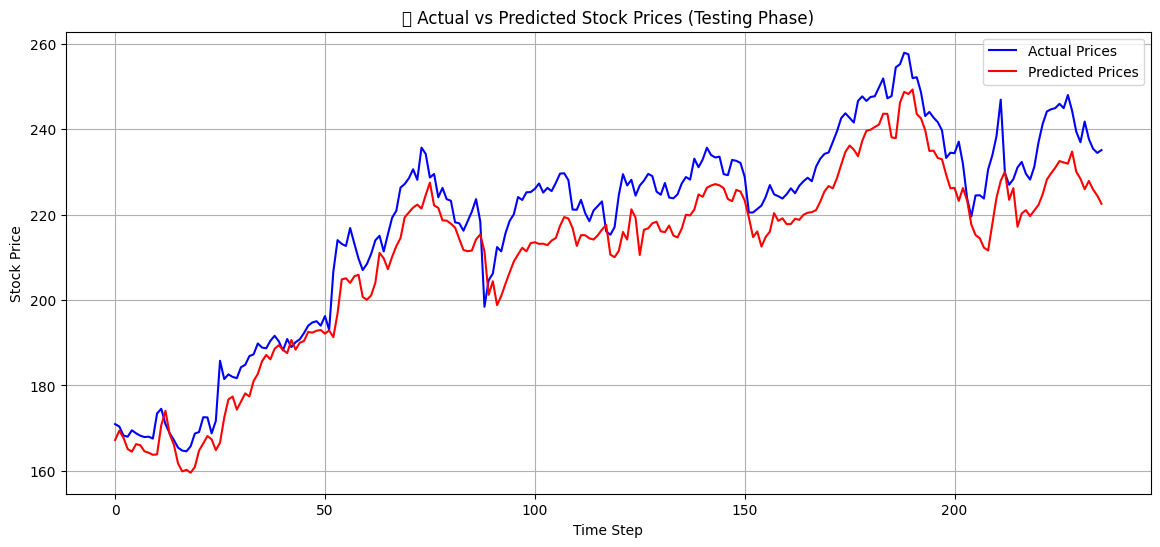

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(actual_prices, label="Actual Prices", color="blue")
plt.plot(predicted_prices, label="Predicted Prices", color="red")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.title("📈 Actual vs Predicted Stock Prices (Testing Phase)")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make sure these are your predicted and actual stock prices (1D arrays)
# predicted_prices = ...
# actual_prices = ...

# Basic Evaluation Metrics
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)
mape = np.mean(np.abs((actual_prices - predicted_prices) / np.maximum(actual_prices, 1e-8))) * 100

# Print results
print("📊 Basic Evaluation Metrics (Testing Phase):")
print(f"✅ Mean Absolute Error (MAE) : {mae:.4f}")

print(f"✅ R² Score                  : {r2:.4f}")
print(f"✅ Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


📊 Basic Evaluation Metrics (Testing Phase):
✅ Mean Absolute Error (MAE) : 7.7962
✅ R² Score                  : 0.8573
✅ Mean Absolute Percentage Error (MAPE): 3.51%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


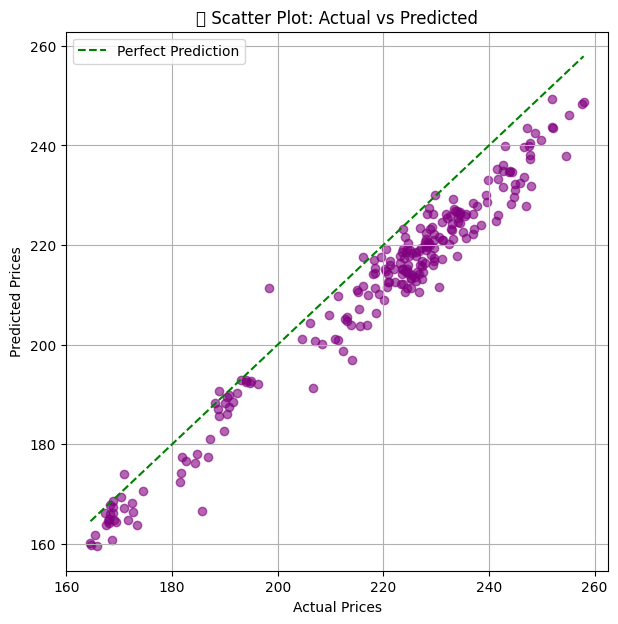

In [8]:
plt.figure(figsize=(7, 7))
plt.scatter(actual_prices, predicted_prices, alpha=0.6, color="purple")
plt.plot([min(actual_prices), max(actual_prices)],
         [min(actual_prices), max(actual_prices)],
         color="green", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("🎯 Scatter Plot: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

[*********************100%***********************]  1 of 1 completed


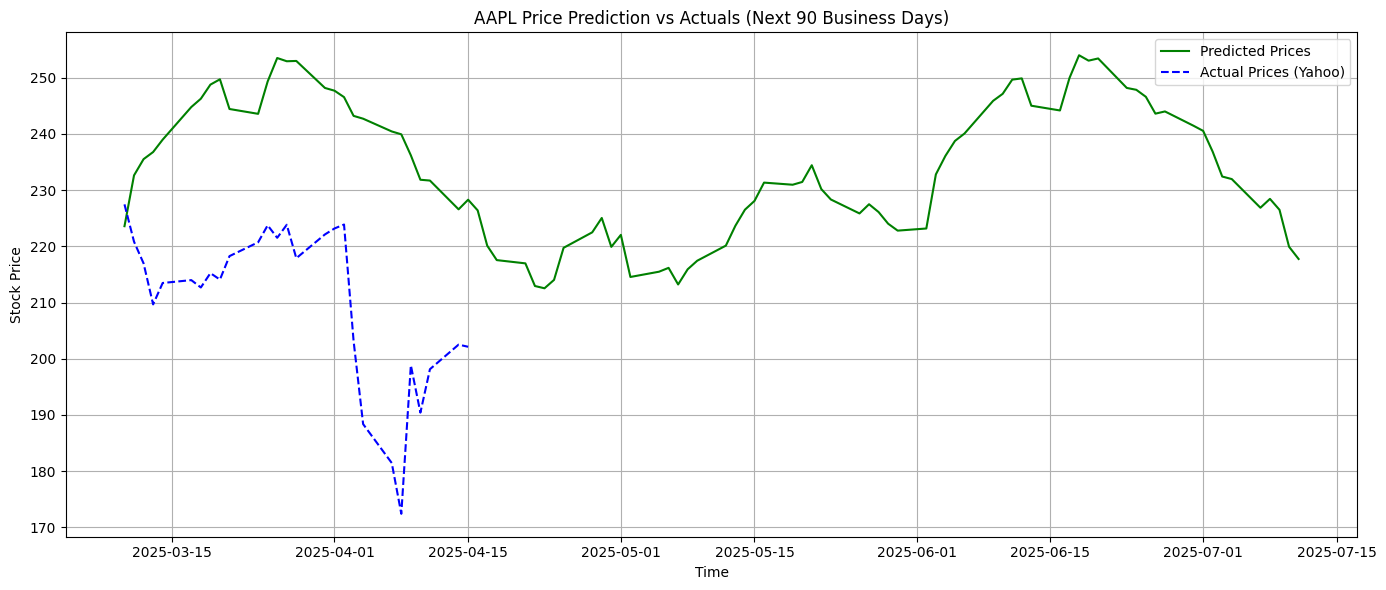

In [11]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
stock_symbol = "AAPL"  # change to your stock
n_days = 90

# Step 1: Predict Future Using Your TCN-LSTM
future_predictions = []
last_sequence = scaled_data[-seq_length:]  # Start with the last known sequence

for _ in range(n_days):
    next_tcn_input = last_sequence.reshape(1, seq_length, scaled_data.shape[1])
    tcn_output = tcn_model.predict(next_tcn_input).reshape(1, 1, 1)
    next_pred = lstm_model.predict(tcn_output)[0][0]
    future_predictions.append(next_pred)

    # Update sequence (shift left and append new prediction)
    next_full_input = np.roll(last_sequence, -1, axis=0)
    next_full_input[-1, 0] = next_pred  # Update 'Close' only
    last_sequence = next_full_input

# Step 2: Inverse transform predicted values
predicted_close = scaler.inverse_transform(
    np.concatenate((np.array(future_predictions).reshape(-1, 1),
                    np.zeros((n_days, scaled_data.shape[1] - 1))), axis=1)
)[:, 0]

# Step 3: Get Future Business Days
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days, freq="B")

# Step 4: Fetch Actual Prices from Yahoo Finance
start_date = future_dates[0].strftime("%Y-%m-%d")
end_date = future_dates[-1].strftime("%Y-%m-%d")

actual_data = yf.download(stock_symbol, start=start_date, end=end_date)
actual_data = actual_data.loc[~actual_data.index.duplicated(keep='first')]
actual_data = actual_data.reindex(future_dates)  # Align with predicted dates
actual_close = actual_data["Close"].values

# Step 5: Plot Comparison
plt.figure(figsize=(14, 6))
plt.plot(future_dates, predicted_close, label="Predicted Prices", color="green")
plt.plot(future_dates, actual_close, label="Actual Prices (Yahoo)", color="blue", linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{stock_symbol} Price Prediction vs Actuals (Next {n_days} Business Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
!pip install yfinance ta scikit-learn matplotlib openpyxl



  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=edd159172e870eeaa6303ba5f4a613159fa0f60fa4c11d4eadf76b6dac206d0d
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

[*********************100%***********************]  1 of 1 completed
<ipython-input-13-c6068a550f5d>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_plot[i] = actual_close[i]


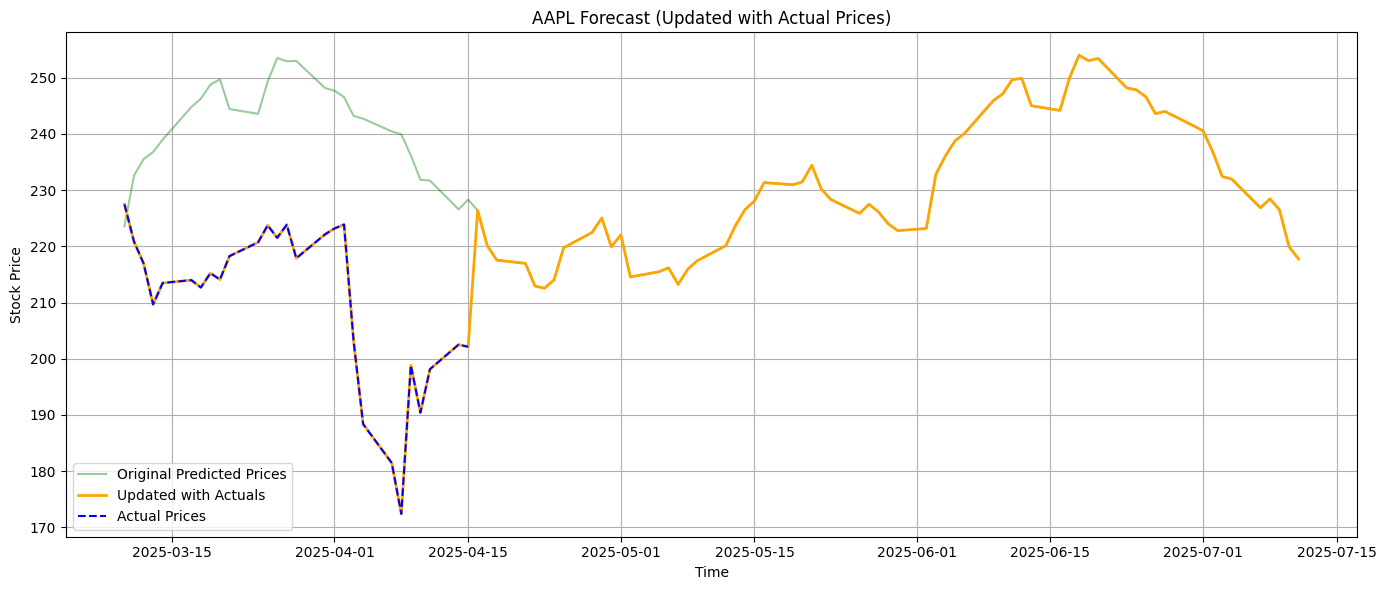

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
stock_symbol = "AAPL"
n_days = 90

# Step 1: Predict Future Using Your TCN-LSTM
future_predictions = []
last_sequence = scaled_data[-seq_length:]  # Start with the last known sequence

for _ in range(n_days):
    next_tcn_input = last_sequence.reshape(1, seq_length, scaled_data.shape[1])
    tcn_output = tcn_model.predict(next_tcn_input).reshape(1, 1, 1)
    next_pred = lstm_model.predict(tcn_output)[0][0]
    future_predictions.append(next_pred)

    # Update sequence (shift left and append new prediction)
    next_full_input = np.roll(last_sequence, -1, axis=0)
    next_full_input[-1, 0] = next_pred  # Update 'Close' only
    last_sequence = next_full_input

# Step 2: Inverse transform predicted values
predicted_close = scaler.inverse_transform(
    np.concatenate((np.array(future_predictions).reshape(-1, 1),
                    np.zeros((n_days, scaled_data.shape[1] - 1))), axis=1)
)[:, 0]

# Step 3: Get Future Business Days
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days, freq="B")

# Step 4: Fetch Available Actual Prices from Yahoo Finance
start_date = future_dates[0].strftime("%Y-%m-%d")
end_date = future_dates[-1].strftime("%Y-%m-%d")

actual_data = yf.download(stock_symbol, start=start_date, end=end_date)
actual_data = actual_data.loc[~actual_data.index.duplicated(keep='first')]
actual_data = actual_data.reindex(future_dates)  # Align with prediction dates

# Step 5: Replace predictions with actual values where available
actual_close = actual_data["Close"].values
final_plot = predicted_close.copy()

for i in range(len(future_dates)):
    if not np.isnan(actual_close[i]):
        final_plot[i] = actual_close[i]

# Step 6: Plot
plt.figure(figsize=(14, 6))
plt.plot(future_dates, predicted_close, label="Original Predicted Prices", color="green", alpha=0.4)
plt.plot(future_dates, final_plot, label="Updated with Actuals", color="orange", linewidth=2)
plt.plot(future_dates, actual_close, label="Actual Prices", color="blue", linestyle="--")

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{stock_symbol} Forecast (Updated with Actual Prices)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

[*********************100%***********************]  1 of 1 completed
<ipython-input-14-a0656f59e46f>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_plot[i] = actual_close[i]


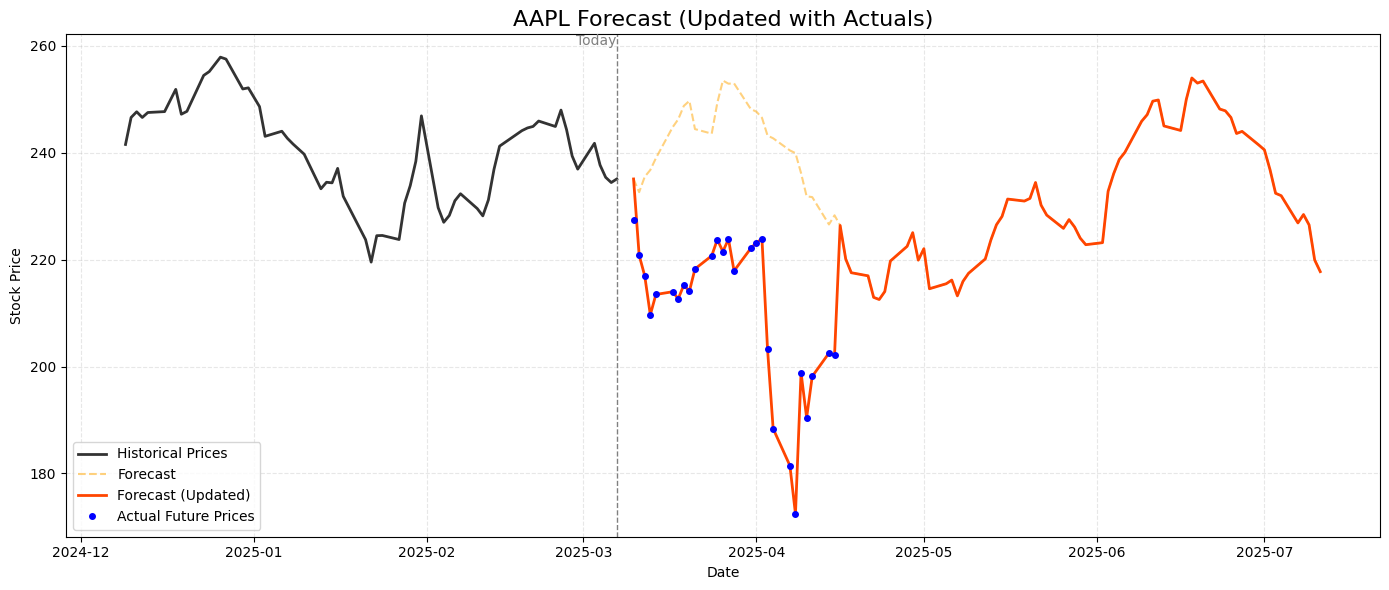

In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
stock_symbol = "AAPL"
n_days = 90

# Predict using TCN + LSTM
future_predictions = []
last_sequence = scaled_data[-seq_length:]

for _ in range(n_days):
    next_tcn_input = last_sequence.reshape(1, seq_length, scaled_data.shape[1])
    tcn_output = tcn_model.predict(next_tcn_input).reshape(1, 1, 1)
    next_pred = lstm_model.predict(tcn_output)[0][0]
    future_predictions.append(next_pred)

    next_full_input = np.roll(last_sequence, -1, axis=0)
    next_full_input[-1, 0] = next_pred
    last_sequence = next_full_input

# Inverse transform predicted values
predicted_close = scaler.inverse_transform(
    np.concatenate((np.array(future_predictions).reshape(-1, 1),
                    np.zeros((n_days, scaled_data.shape[1] - 1))), axis=1)
)[:, 0]

# Future business dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days, freq="B")

# Actuals from Yahoo
start_date = future_dates[0].strftime("%Y-%m-%d")
end_date = future_dates[-1].strftime("%Y-%m-%d")

actual_data = yf.download(stock_symbol, start=start_date, end=end_date)
actual_data = actual_data.loc[~actual_data.index.duplicated(keep='first')]
actual_data = actual_data.reindex(future_dates)
actual_close = actual_data["Close"].values

# Final line: prediction partially replaced by real prices
final_plot = predicted_close.copy()
for i in range(len(future_dates)):
    if not np.isnan(actual_close[i]):
        final_plot[i] = actual_close[i]

# Optional: Align prediction start to actual last value to avoid jump
prediction_start = df['Close'].iloc[-1]
predicted_close[0] = prediction_start  # Align first pred to last known price
final_plot[0] = prediction_start if not np.isnan(actual_close[0]) else predicted_close[0]

# Plot
plt.figure(figsize=(14, 6))

# Past data
plt.plot(df.index[-60:], df["Close"].values[-60:], label="Historical Prices", color="#333", linewidth=2)

# Prediction (faded)
plt.plot(future_dates, predicted_close, label="Forecast", color="orange", linestyle="--", alpha=0.5)

# Updated prediction with actuals
plt.plot(future_dates, final_plot, label="Forecast (Updated)", color="orangered", linewidth=2)

# Actuals (dots only where available)
plt.plot(future_dates, actual_close, 'o', label="Actual Future Prices", color="blue", markersize=4)

# Vertical line: current day
plt.axvline(x=last_date, color="gray", linestyle="--", linewidth=1)
plt.text(last_date, plt.ylim()[1], "Today", fontsize=10, ha="right", va="top", color="gray")

# Style
plt.title(f"{stock_symbol} Forecast (Updated with Actuals)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:
!pip install ta


[*********************100%***********************]  1 of 1 completed
<ipython-input-17-734fd003680f>:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(df["Close"].iloc[-1])



📈 Current Trend: Sideways / Neutral
📊 Trend Strength Score: 0/3
📉 Price Slope (last 30 days): -1.2869
📊 20-day SMA: 208.11 | 50-day SMA: 223.28
📊 Daily Return: -0.19%
📊 14-day Volatility: 0.0595
📌 Price vs SMA Delta: -5.97
🔻 Support (20d Low): 172.42
🔺 Resistance (20d High): 223.89


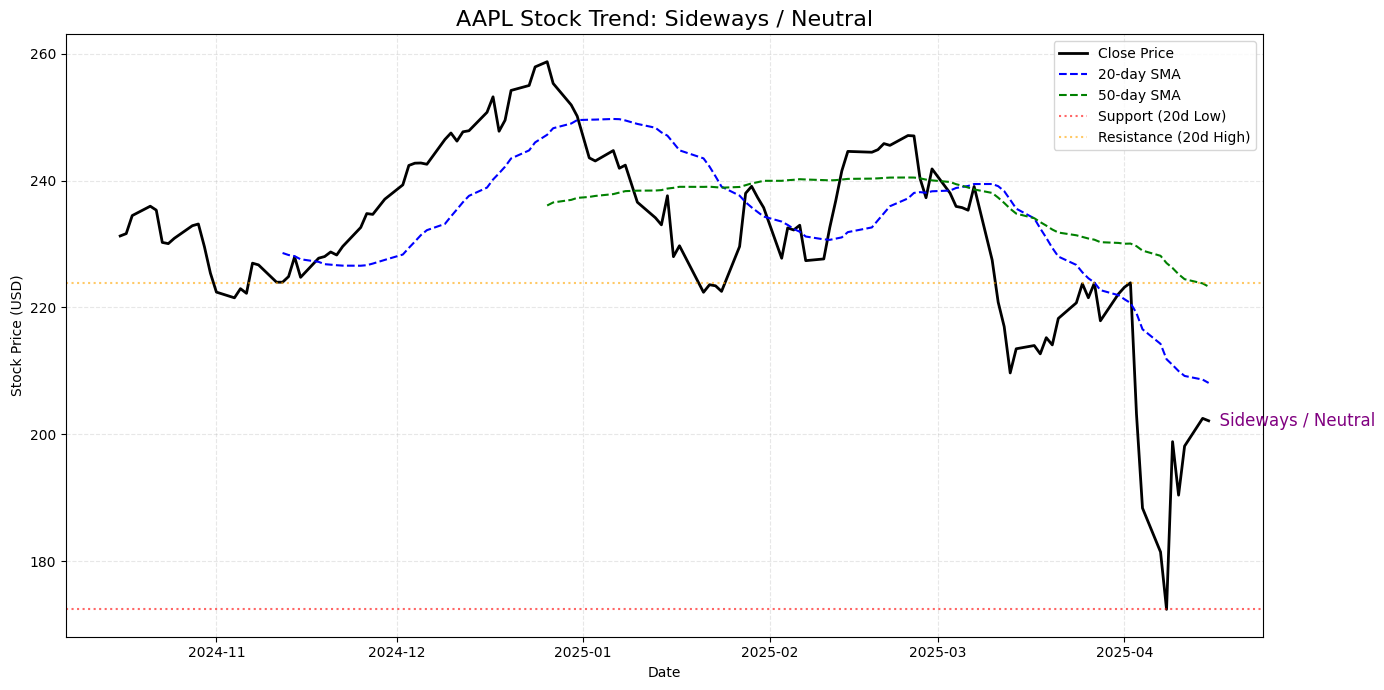

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import yfinance as yf

# --- Step 1: Download Historical Data ---
stock_symbol = "AAPL"
df = yf.download(stock_symbol, period="6mo", interval="1d")
df = df[["Close"]].dropna()

# --- Step 2: Calculate Technical Indicators ---
df["SMA_20"] = df["Close"].rolling(window=20).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["Daily_Return"] = df["Close"].pct_change()
df["Volatility_14"] = df["Daily_Return"].rolling(window=14).std()
df["Rolling_Min_20"] = df["Close"].rolling(window=20).min()
df["Rolling_Max_20"] = df["Close"].rolling(window=20).max()

# --- Step 3: Calculate Trend Slope (last 30 days) ---
window = 30
recent_closes = df["Close"].dropna().values[-window:]
X = np.arange(window).reshape(-1, 1)
model = LinearRegression().fit(X, recent_closes)
slope = float(model.coef_.flatten()[0])  # Safe slope extraction

# --- Step 4: Trend Classification ---
sma_20 = float(df["SMA_20"].iloc[-1])
sma_50 = float(df["SMA_50"].iloc[-1])
price = float(df["Close"].iloc[-1])
volatility = float(df["Volatility_14"].iloc[-1])
daily_return = float(df["Daily_Return"].iloc[-1])
support_20 = float(df["Rolling_Min_20"].iloc[-1])
resistance_20 = float(df["Rolling_Max_20"].iloc[-1])

trend_score = 0
if slope > 0.3: trend_score += 1
if sma_20 > sma_50: trend_score += 1
if daily_return > 0: trend_score += 0.5

if trend_score >= 2.5:
    trend = "Strong Uptrend"
elif trend_score >= 1.5:
    trend = "Moderate Uptrend"
elif trend_score <= -2:
    trend = "Strong Downtrend"
elif trend_score <= -1:
    trend = "Moderate Downtrend"
else:
    trend = "Sideways / Neutral"

# --- Step 5: Display Results ---
print(f"\n📈 Current Trend: {trend}")
print(f"📊 Trend Strength Score: {trend_score}/3")
print(f"📉 Price Slope (last {window} days): {slope:.4f}")
print(f"📊 20-day SMA: {sma_20:.2f} | 50-day SMA: {sma_50:.2f}")
print(f"📊 Daily Return: {daily_return:.2%}")
print(f"📊 14-day Volatility: {volatility:.4f}")
print(f"📌 Price vs SMA Delta: {(price - sma_20):.2f}")
print(f"🔻 Support (20d Low): {support_20:.2f}")
print(f"🔺 Resistance (20d High): {resistance_20:.2f}")

# --- Step 6: Plotting ---
plt.figure(figsize=(14, 7))
plt.plot(df["Close"], label="Close Price", color="black", linewidth=2)
plt.plot(df["SMA_20"], label="20-day SMA", color="blue", linestyle="--")
plt.plot(df["SMA_50"], label="50-day SMA", color="green", linestyle="--")
plt.axhline(support_20, color="red", linestyle=":", label="Support (20d Low)", alpha=0.6)
plt.axhline(resistance_20, color="orange", linestyle=":", label="Resistance (20d High)", alpha=0.6)

# Annotate current trend
plt.text(df.index[-1], price, f'  {trend}', color="purple", fontsize=12, va='center')

plt.title(f"{stock_symbol} Stock Trend: {trend}", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [18]:
!pip install yfinance matplotlib scipy pandas numpy
!pip install pytesseract
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.



📌 SMART MONEY ENTRY TABLE


,Entry Price,Low,High,Volume
Date,,,,
2020-10-12,121.302292,116.309783,122.062868,240226800.0
2020-10-13,118.084473,116.670582,122.267648,262330500.0
2020-11-30,116.285782,114.097787,118.161200,169410200.0
2020-12-15,124.910774,121.247845,124.930314,157243700.0
2020-12-22,128.817917,126.639684,131.289172,168904800.0
2021-12-01,161.936401,161.700523,167.371299,152052500.0
2021-12-02,160.943756,155.086261,161.376192,136739200.0
2022-01-28,167.400787,160.000284,167.420448,179935700.0
2022-10-28,153.695053,145.879049,155.431938,164762400.0


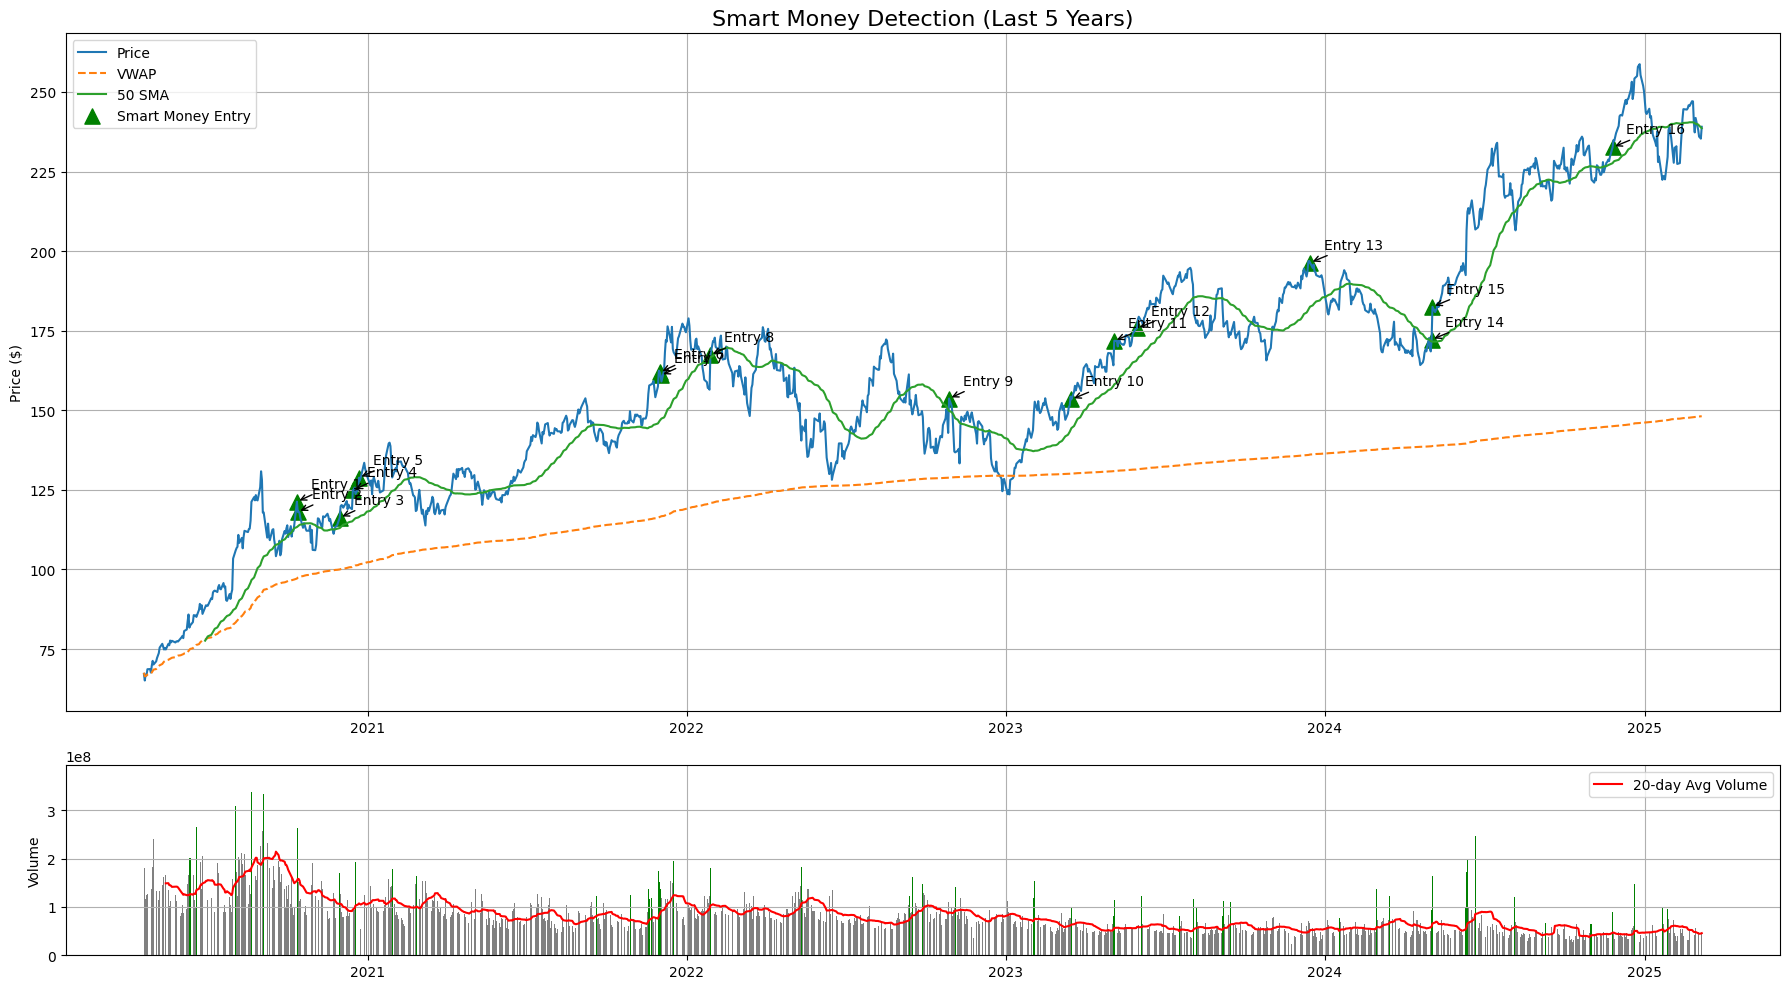


📈 SMART MONEY ANALYSIS REPORT
Total entries detected: 16
Last entry: 2024-11-25 (142 days ago)

📊 Avg Max Return (90 days): 13.15%
Success Rate (>5%): 87.50%

💡 Market Snapshot:
Price is above VWAP (61.37%)
Volume is normal


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ta.volume import OnBalanceVolumeIndicator, AccDistIndexIndicator
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from datetime import datetime, timedelta

def load_and_preprocess_data(file_path):
    """Load and preprocess the stock data"""
    try:
        # Load Excel with multi-index columns
        df = pd.read_excel(file_path, header=[0, 1])

        # Flatten multi-level columns
        df.columns = ['_'.join(col).strip() for col in df.columns.values]
        df.rename(columns={'Price_Ticker': 'Date'}, inplace=True)

        # Remove header/footer noise
        df = df[~df['Date'].astype(str).str.contains("Date", case=False, na=False)]
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.dropna(subset=['Date'], inplace=True)
        df.set_index('Date', inplace=True)

        # Filter for last 5 years
        df = df[df.index >= datetime.now() - timedelta(days=5*365)]

        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def calculate_technical_indicators(df):
    """Calculate VWAP, OBV, ADL, RSI, SMA indicators"""
    close = df['Close_AAPL']
    high = df['High_AAPL']
    low = df['Low_AAPL']
    volume = df['Volume_AAPL']

    typical_price = (high + low + close) / 3
    vwap = (typical_price * volume).cumsum() / volume.cumsum()
    obv = OnBalanceVolumeIndicator(close=close, volume=volume).on_balance_volume()
    adl = AccDistIndexIndicator(high=high, low=low, close=close, volume=volume).acc_dist_index()
    rsi = RSIIndicator(close=close, window=14).rsi()
    sma_50 = SMAIndicator(close=close, window=50).sma_indicator()

    return {
        'close': close,
        'high': high,
        'low': low,
        'volume': volume,
        'vwap': vwap,
        'obv': obv,
        'adl': adl,
        'rsi': rsi,
        'sma_50': sma_50
    }

def detect_smart_money_entries(data, lookback_days=30):
    entries = []
    close, vwap, obv, adl = data['close'], data['vwap'], data['obv'], data['adl']
    volume, rsi, sma_50 = data['volume'], data['rsi'], data['sma_50']

    for i in range(30, len(close)):
        price_above_vwap = close.iloc[i] > vwap.iloc[i]
        vwap_uptrend = vwap.iloc[i] > vwap.iloc[i-5]
        volume_spike = volume.iloc[i] > 1.5 * volume.iloc[i-20:i].mean()
        obv_up = obv.iloc[i] > obv.iloc[i-5]
        adl_up = adl.iloc[i] > adl.iloc[i-5]
        price_above_sma = close.iloc[i] > sma_50.iloc[i]
        rsi_valid = 40 < rsi.iloc[i] < 70
        recent_low = min(close.iloc[i-5:i])

        if (price_above_vwap and vwap_uptrend and volume_spike and
            (obv_up or adl_up) and price_above_sma and rsi_valid and
            close.iloc[i] > recent_low * 1.02):
            entries.append(close.index[i])
    return entries

def plot_results(data, entries):
    plt.figure(figsize=(18, 10))
    ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
    ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1)

    ax1.plot(data['close'], label='Price', color='#1f77b4')
    ax1.plot(data['vwap'], label='VWAP', linestyle='--', color='#ff7f0e')
    ax1.plot(data['sma_50'], label='50 SMA', color='#2ca02c')

    if entries:
        prices = data['close'].loc[entries]
        ax1.scatter(entries, prices, color='green', marker='^', s=120, label='Smart Money Entry')
        for i, date in enumerate(entries):
            ax1.annotate(f'Entry {i+1}', xy=(date, prices.iloc[i]),
                         xytext=(10, 10), textcoords='offset points',
                         arrowprops=dict(arrowstyle='->'))

    ax1.set_title('Smart Money Detection (Last 5 Years)', fontsize=16)
    ax1.set_ylabel('Price ($)')
    ax1.legend()
    ax1.grid(True)

    ax2.bar(data['volume'].index, data['volume'],
            color=np.where(data['volume'] > 1.5 * data['volume'].rolling(20).mean(), 'green', 'gray'))
    ax2.plot(data['volume'].rolling(20).mean(), color='red', label='20-day Avg Volume')
    ax2.set_ylabel('Volume')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def generate_report(entries, data):
    print("\n📈 SMART MONEY ANALYSIS REPORT")
    print("="*40)
    print(f"Total entries detected: {len(entries)}")

    if entries:
        last_entry = entries[-1]
        days_ago = (datetime.now() - last_entry).days
        print(f"Last entry: {last_entry.strftime('%Y-%m-%d')} ({days_ago} days ago)")

        returns = []
        for entry_date in entries:
            future = data['close'][entry_date:entry_date+timedelta(days=90)]
            if not future.empty:
                max_return = (future.max() - data['close'].loc[entry_date]) / data['close'].loc[entry_date] * 100
                returns.append(max_return)

        if returns:
            print(f"\n📊 Avg Max Return (90 days): {np.mean(returns):.2f}%")
            print(f"Success Rate (>5%): {100 * sum(r > 5 for r in returns)/len(returns):.2f}%")

    # Market snapshot
    close, vwap, volume = data['close'].iloc[-1], data['vwap'].iloc[-1], data['volume'].iloc[-1]
    avg_vol = data['volume'].rolling(20).mean().iloc[-1]
    print("\n💡 Market Snapshot:")
    print(f"Price is {'above' if close > vwap else 'below'} VWAP ({abs((close - vwap) / vwap * 100):.2f}%)")
    print(f"Volume is {'high' if volume > 1.5 * avg_vol else 'normal'}")

# 📋 Create table of Smart Money Entry signals
if entries:
    entry_data = pd.DataFrame({
        'Date': entries,
        'Entry Price': indicators['close'].loc[entries].values,
        'Low': indicators['low'].loc[entries].values,
        'High': indicators['high'].loc[entries].values,
        'Volume': indicators['volume'].loc[entries].values
    })

    entry_data.set_index('Date', inplace=True)
    print("\n📌 SMART MONEY ENTRY TABLE")
    display(entry_data)
else:
    print("\n❌ No smart money entries detected.")


# 🔁 Run the pipeline
file_path = "AAPL_stock_data.xlsx"
df = load_and_preprocess_data(file_path)

if df is not None:
    indicators = calculate_technical_indicators(df)
    entries = detect_smart_money_entries(indicators)
    plot_results(indicators, entries)
    generate_report(entries, indicators)


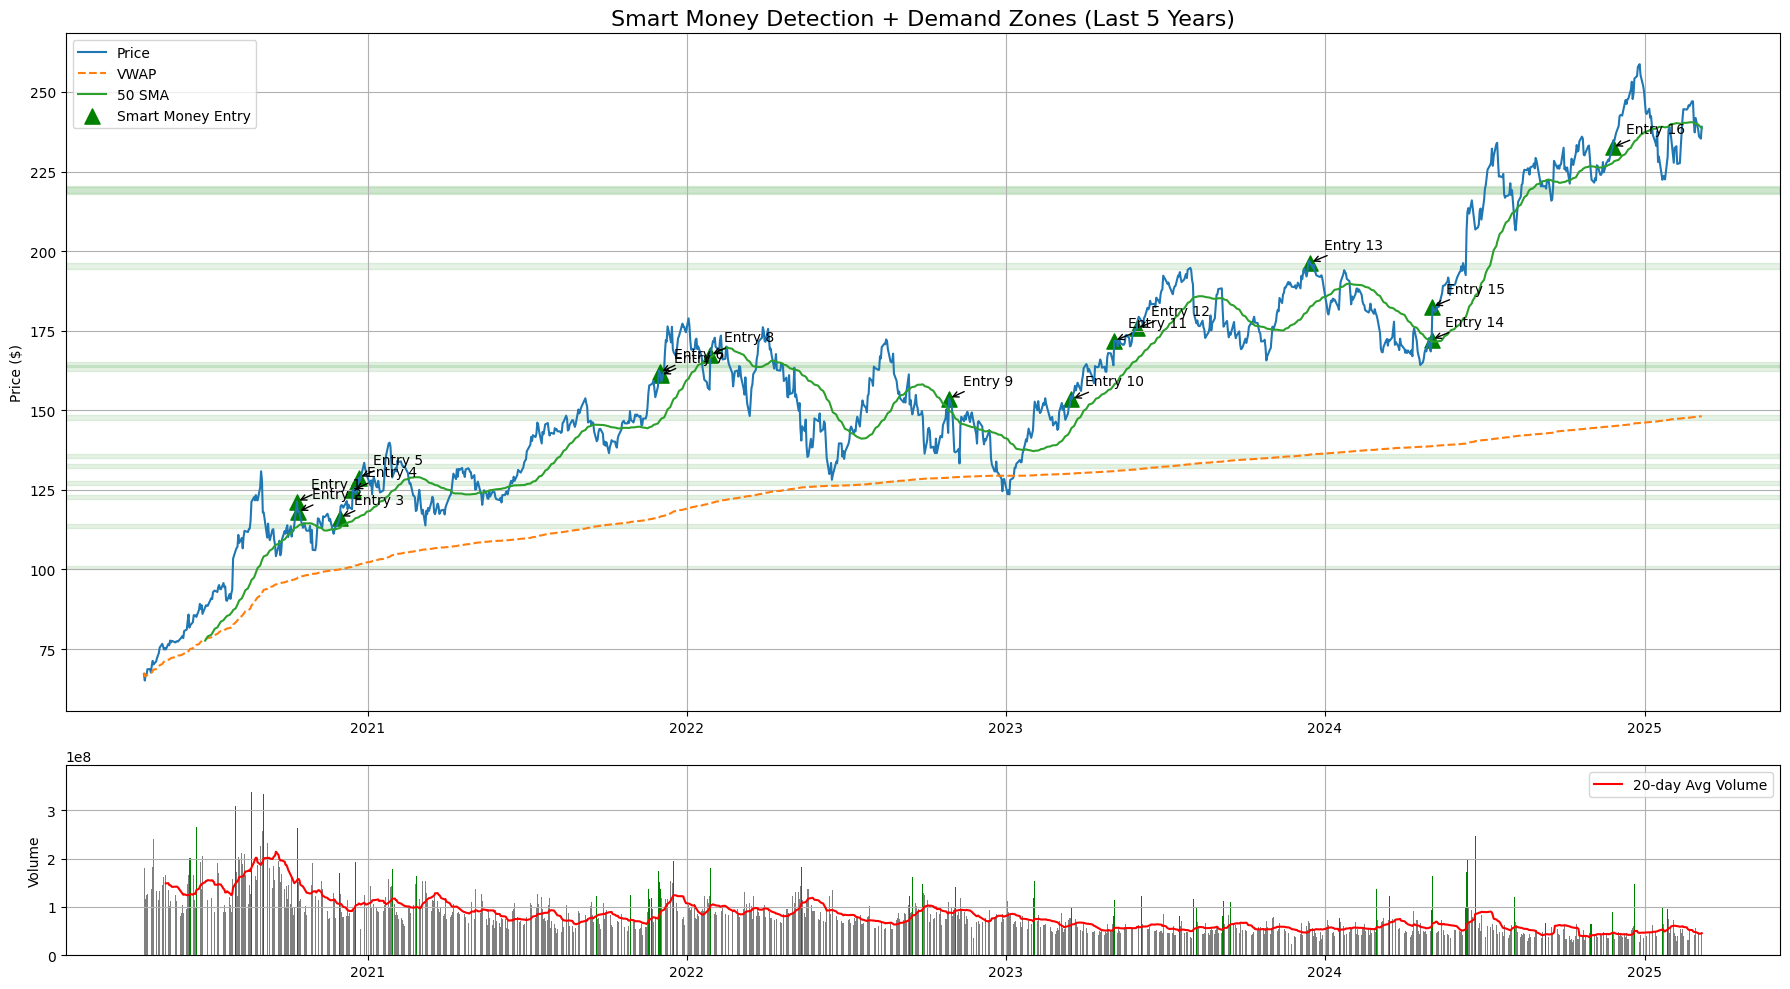


📌 SMART MONEY ENTRY TABLE


,Entry Price,Low,High,Volume
Date,,,,
2020-10-12,121.302292,116.309783,122.062868,240226800.0
2020-10-13,118.084473,116.670582,122.267648,262330500.0
2020-11-30,116.285782,114.097787,118.161200,169410200.0
2020-12-15,124.910774,121.247845,124.930314,157243700.0
2020-12-22,128.817917,126.639684,131.289172,168904800.0
2021-12-01,161.936401,161.700523,167.371299,152052500.0
2021-12-02,160.943756,155.086261,161.376192,136739200.0
2022-01-28,167.400787,160.000284,167.420448,179935700.0
2022-10-28,153.695053,145.879049,155.431938,164762400.0


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from ta.volume import OnBalanceVolumeIndicator, AccDistIndexIndicator
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator

# 1. Load and preprocess
def load_and_preprocess_data(file_path):
    df = pd.read_excel(file_path, header=[0, 1])
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    df.rename(columns={'Price_Ticker': 'Date'}, inplace=True)

    df = df[~df['Date'].astype(str).str.contains("Date", case=False, na=False)]
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    df.set_index('Date', inplace=True)
    df = df[df.index >= datetime.now() - timedelta(days=5*365)]
    return df

# 2. Calculate indicators
def calculate_technical_indicators(df):
    close = df['Close_AAPL']
    high = df['High_AAPL']
    low = df['Low_AAPL']
    volume = df['Volume_AAPL']

    typical_price = (high + low + close) / 3
    vwap = (typical_price * volume).cumsum() / volume.cumsum()
    obv = OnBalanceVolumeIndicator(close=close, volume=volume).on_balance_volume()
    adl = AccDistIndexIndicator(high=high, low=low, close=close, volume=volume).acc_dist_index()
    rsi = RSIIndicator(close=close, window=14).rsi()
    sma_50 = SMAIndicator(close=close, window=50).sma_indicator()

    return {
        'close': close,
        'high': high,
        'low': low,
        'volume': volume,
        'vwap': vwap,
        'obv': obv,
        'adl': adl,
        'rsi': rsi,
        'sma_50': sma_50
    }

# 3. Smart money entry detection
def detect_smart_money_entries(data):
    entries = []
    close, vwap, obv, adl = data['close'], data['vwap'], data['obv'], data['adl']
    volume, rsi, sma_50 = data['volume'], data['rsi'], data['sma_50']

    for i in range(30, len(close)):
        price_above_vwap = close.iloc[i] > vwap.iloc[i]
        vwap_uptrend = vwap.iloc[i] > vwap.iloc[i-5]
        volume_spike = volume.iloc[i] > 1.5 * volume.iloc[i-20:i].mean()
        obv_up = obv.iloc[i] > obv.iloc[i-5]
        adl_up = adl.iloc[i] > adl.iloc[i-5]
        price_above_sma = close.iloc[i] > sma_50.iloc[i]
        rsi_valid = 40 < rsi.iloc[i] < 70
        recent_low = min(close.iloc[i-5:i])

        if (price_above_vwap and vwap_uptrend and volume_spike and
            (obv_up or adl_up) and price_above_sma and rsi_valid and
            close.iloc[i] > recent_low * 1.02):
            entries.append(close.index[i])
    return entries

# 4. Demand zone detection (support areas)
def detect_demand_zones(data, window=30):
    lows = data['low']
    demand_zones = []
    for i in range(window, len(lows)-window):
        zone = lows.iloc[i-window:i+window]
        if lows.iloc[i] == zone.min():
            demand_zones.append((lows.index[i], lows.iloc[i]))
    return demand_zones

# 5. Plotting
def plot_results(data, entries, demand_zones):
    plt.figure(figsize=(18, 10))
    ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
    ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1)

    ax1.plot(data['close'], label='Price', color='#1f77b4')
    ax1.plot(data['vwap'], label='VWAP', linestyle='--', color='#ff7f0e')
    ax1.plot(data['sma_50'], label='50 SMA', color='#2ca02c')

    # Plot entries
    if entries:
        prices = data['close'].loc[entries]
        ax1.scatter(entries, prices, color='green', marker='^', s=120, label='Smart Money Entry')
        for i, date in enumerate(entries):
            ax1.annotate(f'Entry {i+1}', xy=(date, prices.iloc[i]), xytext=(10, 10),
                         textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Plot demand zones
    for date, low in demand_zones:
        ax1.axhspan(low * 0.995, low * 1.005, color='green', alpha=0.1)

    ax1.set_title("Smart Money Detection + Demand Zones (Last 5 Years)", fontsize=16)
    ax1.set_ylabel("Price ($)")
    ax1.legend()
    ax1.grid(True)

    # Volume plot
    ax2.bar(data['volume'].index, data['volume'],
            color=np.where(data['volume'] > 1.5 * data['volume'].rolling(20).mean(), 'green', 'gray'))
    ax2.plot(data['volume'].rolling(20).mean(), color='red', label='20-day Avg Volume')
    ax2.set_ylabel("Volume")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# 6. Report
def generate_entry_table(entries, data):
    if entries:
        entry_data = pd.DataFrame({
            'Date': entries,
            'Entry Price': data['close'].loc[entries].values,
            'Low': data['low'].loc[entries].values,
            'High': data['high'].loc[entries].values,
            'Volume': data['volume'].loc[entries].values
        })
        entry_data.set_index('Date', inplace=True)
        print("\n📌 SMART MONEY ENTRY TABLE")
        display(entry_data)
    else:
        print("\n❌ No smart money entries detected.")

# 🔁 Run pipeline
file_path = "AAPL_stock_data.xlsx"
df = load_and_preprocess_data(file_path)

if df is not None:
    indicators = calculate_technical_indicators(df)
    entries = detect_smart_money_entries(indicators)
    demand_zones = detect_demand_zones(indicators)
    plot_results(indicators, entries, demand_zones)
    generate_entry_table(entries, indicators)
